<a href="https://colab.research.google.com/github/AdamMcCloskey381/Udemy-ML/blob/main/SMV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
iris = load_iris()
df = pd.DataFrame(data = np.c_[iris["data"], iris["target"]],
                  columns = iris["feature_names"] + ["target"])

In [141]:
df["target"] = df["target"].apply(int).values 
df_zero = df[df["target"] == 0.0] 
df_one = df[df["target"] == 1.0]

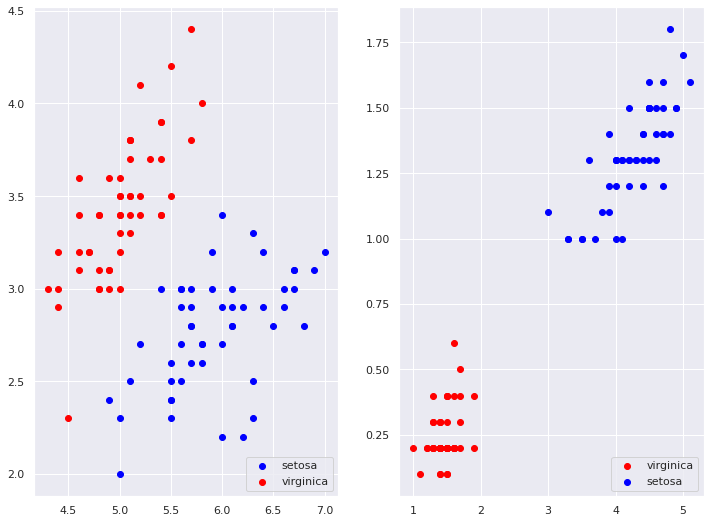

In [142]:
sns.set(font_scale = 1)
fig = plt.figure(figsize = (12, 9))
plt.subplot(1, 2, 1)
plt.scatter(x = df_one["sepal length (cm)"], y = df_one["sepal width (cm)"], c = "blue", label = "setosa")
plt.scatter(x = df_zero["sepal length (cm)"], y = df_zero["sepal width (cm)"], c = "red", label = "virginica")
plt.legend(loc = "lower right")

plt.subplot(1, 2, 2)
plt.scatter(x = df_zero["petal length (cm)"], y = df_zero["petal width (cm)"], c = "red", label = "virginica")
plt.scatter(x = df_one["petal length (cm)"], y = df_one["petal width (cm)"], c = "blue", label = "setosa")
plt.legend(loc = "lower right")

In [143]:
### Creating SVM instance
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")

In [162]:
x = df.iloc[:, [1, 2]]
y = df.loc[:, df.columns == "target"]

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [157]:
y_train = np.ravel(y_train)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.9464285714285714

In [159]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, classifier.predict(x_test))
score

1.0

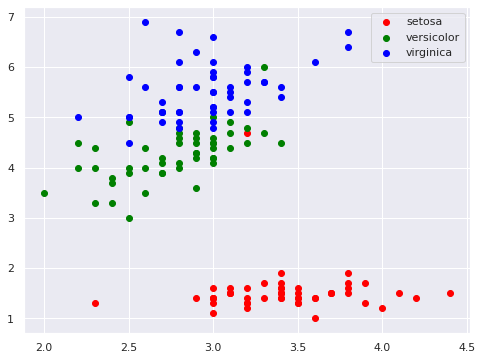

In [170]:
### plotting the outcome

plt.figure(figsize = (8, 6))
plt.scatter(x = x.iloc[:51, 0], y = x.iloc[:51, 1], c = "red", label = iris["target_names"][0])
plt.scatter(x = x.iloc[51:101, 0], y = x.iloc[51:101, 1], c = "green", label = iris["target_names"][1])
plt.scatter(x = x.iloc[101:151, 0], y = x.iloc[101:151, 1], c = "blue", label = iris["target_names"][2])
plt.legend(loc = "upper right")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



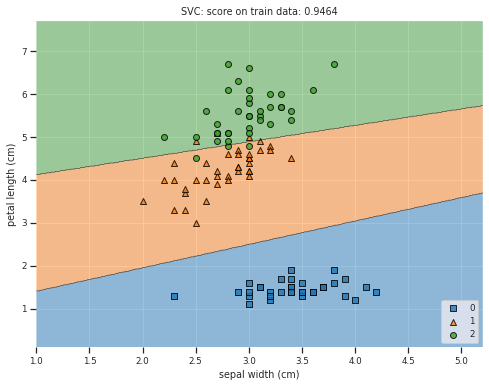

In [190]:
from mlxtend.plotting import plot_decision_regions
sns.set(font_scale = 0.8)
### model accuracy on train score
plt.figure(figsize=(8, 6))
plot_decision_regions(x_train.values, y_train, classifier)
plt.xlabel(iris["feature_names"][1])
plt.ylabel(iris["feature_names"][2])
plt.title(f"SVC: score on train data: {round(classifier.score(x_train, y_train), 4)}")
plt.legend(loc = "lower right")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



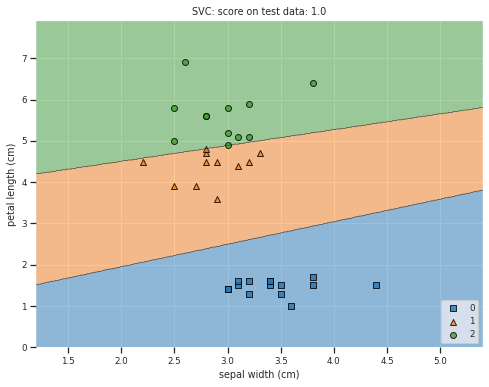

In [192]:
### testing model score on test dataset
plt.figure(figsize = (8, 6))
plot_decision_regions(x_test.values, np.ravel(y_test), classifier)
plt.xlabel(iris["feature_names"][1])
plt.ylabel(iris["feature_names"][2])
plt.title(f"SVC: score on test data: {round(classifier.score(x_test, y_test), 4)}")
plt.legend(loc = "lower right")

In [203]:
### rbf- radial basis function- distance of points
classifier_rbf = SVC(C = 1.0, kernel = "rbf")
classifier_rbf.fit(x_train, y_train)

SVC()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



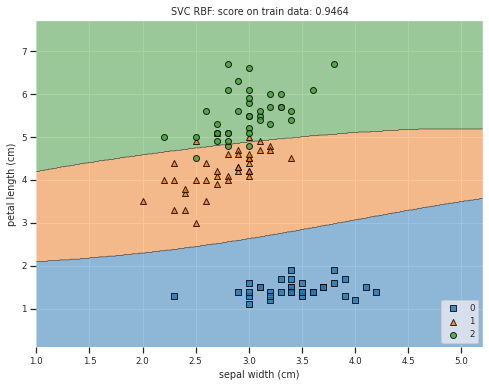

In [204]:
plt.figure(figsize = (8, 6))
plot_decision_regions(x_train.values, y_train, classifier_rbf)
plt.xlabel(iris["feature_names"][1])
plt.ylabel(iris["feature_names"][2])
plt.title(f"SVC RBF: score on train data: {round(classifier_rbf.score(x_train, y_train), 4)}")
plt.legend(loc = "lower right")